### Heart Disease Predictions using Supervised Learning



### About Peterside Hospital
Peterside Hospital is a private hospital located in Lagos,Nigeria. It was founded in 2000 by Dr. Efemena Ikpro, a
renowned Nigerian physician. The hospital provides a widerange of medical services, including general medicine, surgery,paediatrics, obstetrics and gynaecology, cardiology, neurology,and oncology.Peterside Hospital is known for its state-of-the-art facilities, modern equipment, and highly skilled medical professionals.

The hospital has a team of over 300 medical personnel,including doctors, nurses, and other healthcare professionals, who are trained locally and internationally.The hospital has several specialized clinics, including a diabetes clinic, a fertility clinic, a heart clinic, and a cancer clinic. It also offers services such as health check-ups, laboratory tests, and imaging services.

### OBJECTIVES:

- Model Development: Create a machine-learning model capable of accurately predicting the probability of an individual having heart disease based on relevant features.
    
- Feature Engineering and Selection: Engineer informative features and select the most predictive ones to optimize the model's performance and interpretability.
    
- Deployment and Maintenance: Deploy the trained model into a production environment, ensuring scalability and reliability, and establish protocols for ongoing monitoring and maintenance to sustain its effectiveness over time.

### importing the necessary libraries

In [ ]:
# for Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data pre proceessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation matrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading in data
df = pd.read_csv('heart_heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Features in the dataset and meaning:
- age - age in years,
- sex (1 = male; 0 = female),
- cp - chest pain type (1: typical angina, 2: atypical angina,3: non-anginal pain, 4: asymptomatic),
- trestbps - resting blood pressure (in mn Hg on admission to the hospital), 
- chol -serum cholestoral in mg/di,
- fbs - (fasting blood sugar › 120 mg/dl) (2 = true; 0 = false),
- restecg resting electrocardiographic results,
- thalach - maximum heart rate achieved,
- exang - exercise induced angina (1 = yes; 0 = no),
- oldpeak - ST depression induced by exercise relative to rest, 
- slope - the slope of the peak exercise ST segment,
- ca - number of major vessels (0-3) colored by flourosopy, thal -
- thal - 3 - normal; 6 = fixed defect; 7 = reversable defect,
- target - have disease or not (1-yes,or =no).



In [3]:
# Assigning new column names
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_archieved', 
              'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

# Displaying the first few rows of the DataFrame
df.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_archieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       303 non-null    int64  
 1   sex                       303 non-null    int64  
 2   chest_pain_type           303 non-null    int64  
 3   resting_blood_pressure    303 non-null    int64  
 4   cholesterol               303 non-null    int64  
 5   fasting_blood_sugar       303 non-null    int64  
 6   rest_ecg                  303 non-null    int64  
 7   max_heart_rate_archieved  303 non-null    int64  
 8   exercise_induced_angina   303 non-null    int64  
 9   st_depression             303 non-null    float64
 10  st_slope                  303 non-null    int64  
 11  num_major_vessels         303 non-null    int64  
 12  thalassemia               303 non-null    int64  
 13  target                    303 non-null    int64  
dtypes: float64

In [5]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_archieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                         0
sex                         0
chest_pain_type             0
resting_blood_pressure      0
cholesterol                 0
fasting_blood_sugar         0
rest_ecg                    0
max_heart_rate_archieved    0
exercise_induced_angina     0
st_depression               0
st_slope                    0
num_major_vessels           0
thalassemia                 0
target                      0
dtype: int64


<AxesSubplot: >

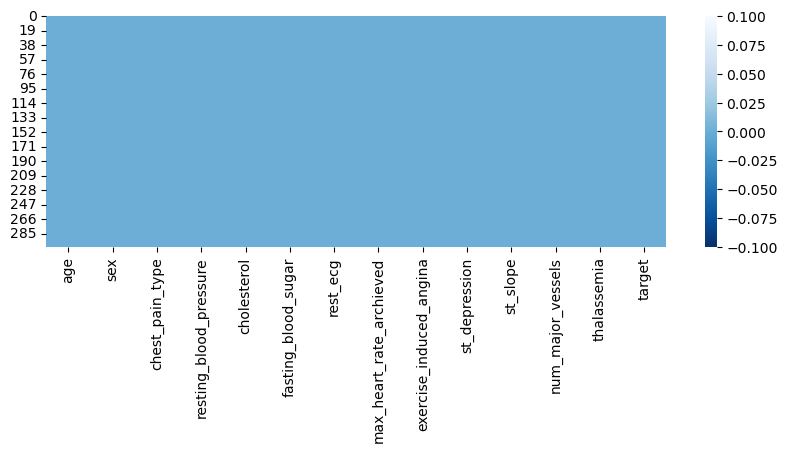

In [6]:
print(df.isnull().sum())

plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

### Exploratory Data Analysis


### Univariate Analysis

In [7]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_archieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

<AxesSubplot: xlabel='thalassemia'>

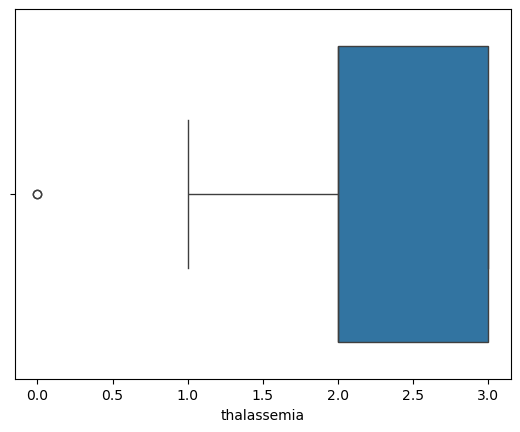

In [8]:
# check for outliers 
sns.boxplot(x=df["thalassemia"])

<AxesSubplot: xlabel='resting_blood_pressure'>

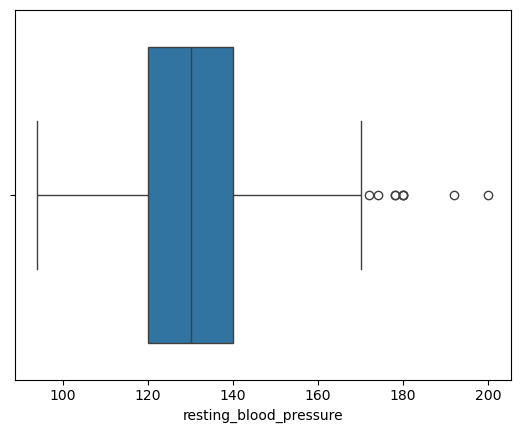

In [9]:
sns.boxplot(x=df["resting_blood_pressure"])

<AxesSubplot: xlabel='cholesterol'>

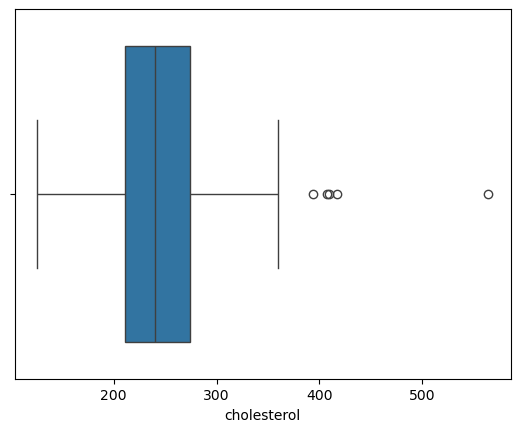

In [10]:
sns.boxplot(x=df["cholesterol"])

<AxesSubplot: xlabel='max_heart_rate_archieved'>

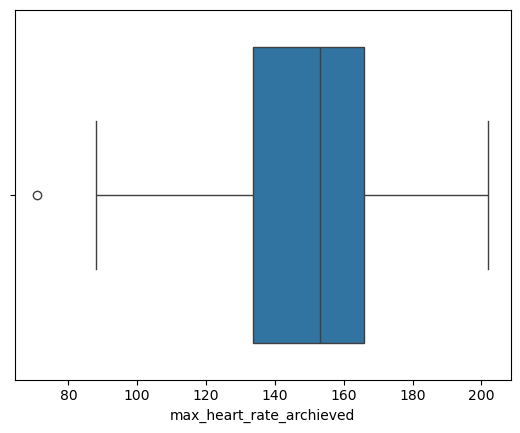

In [11]:
sns.boxplot(x=df["max_heart_rate_archieved"])

In [12]:

# Data Visualization
# Age bracket function definition
def age_bracket(age):
    if age <= 35:
        return "Youth (<=35)"
    elif age <= 55:
        return "Adult (<=55)"
    elif age <= 65:
        return "Old Adult (<=65)"
    else:
        return "Elderly (>65)"





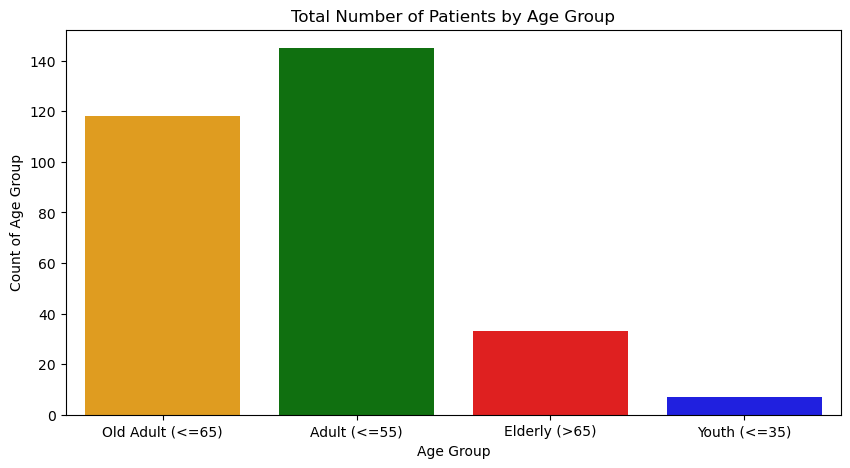

In [13]:
# Define a color palette for different age groups
age_palette = {
    "Youth (<=35)": "blue",
    "Adult (<=55)": "green",
    "Old Adult (<=65)": "orange",
    "Elderly (>65)": "red"
}

# Applying the age bracket function to create a new column 'age_bracket' in the DataFrame
df['age_bracket'] = df['age'].apply(age_bracket)

# Investigating the age group of patients with color-coded bars
plt.figure(figsize=(10, 5))
sns.countplot(x='age_bracket', data=df, palette=age_palette)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients by Age Group')
plt.show()


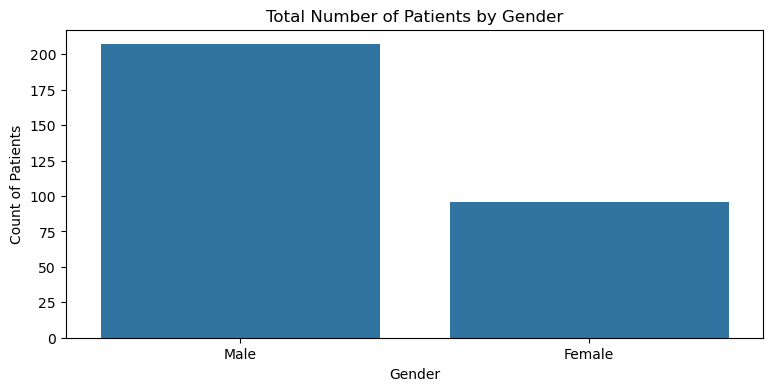

In [14]:
# Data visualization
# sex
def gender(sex):
    if sex == 1:
        return "Male"
    else:
        return "Female"

df['gender'] = df['sex'].apply(gender)

# Investigating the gender distribution of the patients
plt.figure(figsize=(9, 4))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count of Patients')
plt.title('Total Number of Patients by Gender')
plt.show()


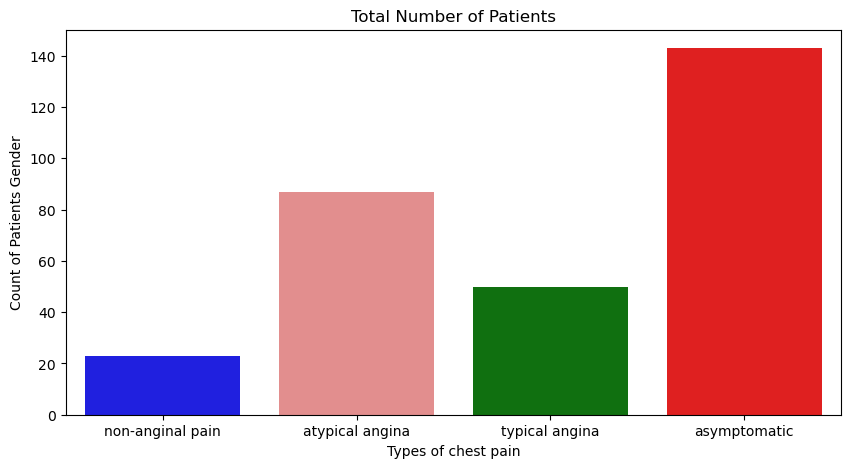

In [15]:
# Data visualization
# sex
def chest_pain(cp):
    if cp == 1:
        return "typical angina"
    elif cp == 2:
        return "atypical angina"
    elif cp == 3:
        return "non-anginal pain"
    else:
        return "asymptomatic"

df['cp_cat'] = df['chest_pain_type'].apply(chest_pain)

# Create a color palette for the countplot
palette = sns.color_palette(["blue", "lightcoral", "green", "red"])  # Customize colors


# Investigating the gender distribution of the patients
plt.figure(figsize=(10, 5))
sns.countplot(x='cp_cat', data=df, palette=palette)
plt.xlabel('Types of chest pain')
plt.ylabel('Count of Patients Gender')
plt.title('Total Number of Patients')
plt.show()


label
Yes    165
No     138
Name: count, dtype: int64


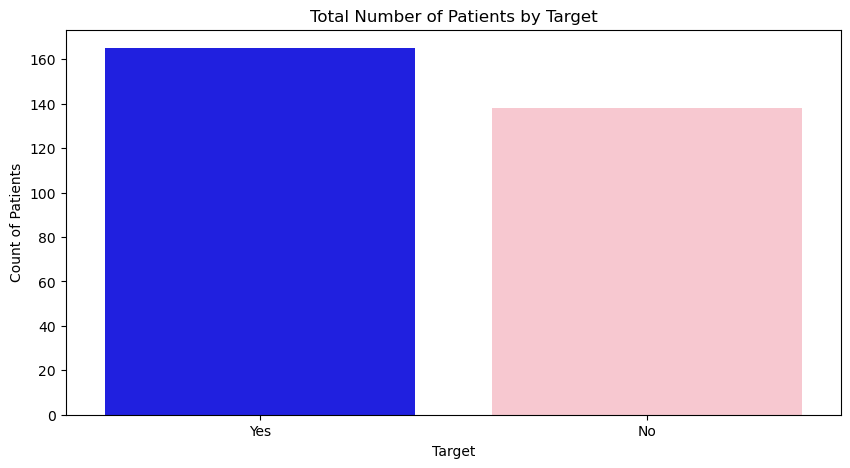

In [16]:
def label(tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"

df['label'] = df['target'].apply(label)

print(df["label"].value_counts())

palette = sns.color_palette(["blue", "pink"]) 

# Investigating the distribution of the target variable among patients
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=df, palette=palette)
plt.xlabel('Target')
plt.ylabel('Count of Patients')
plt.title('Total Number of Patients by Target')
plt.show()


### OBSERVATIONS:

After the Univariate Analysis, we observed that some features in the dataset have outliers, indicating the presence of extreme values that deviate significantly from the majority of data points. These outliers can potentially skew statistical measures and affect the performance of machine-learning models, necessitating further investigation and potential remediation through outlier detection and treatment techniques.



### Bivariate Analysis

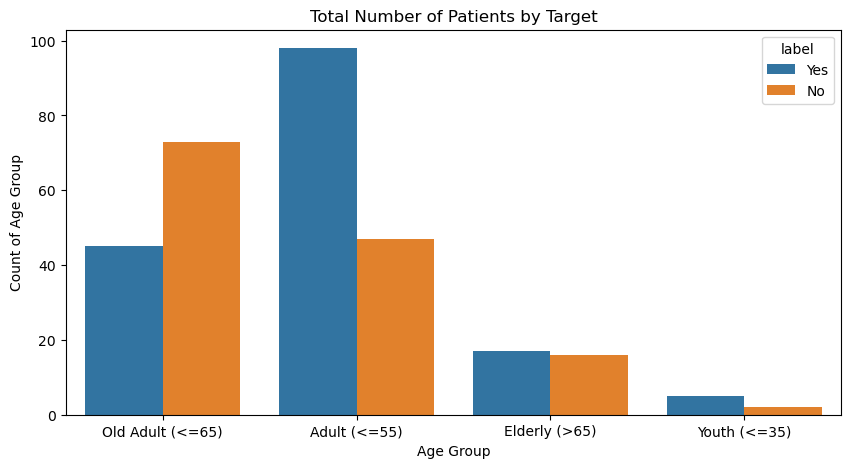

In [17]:
# Investigating the distribution of the target variable among patients
plt.figure(figsize=(10, 5))
sns.countplot(x='age_bracket', data=df, hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients by Target')
plt.show()


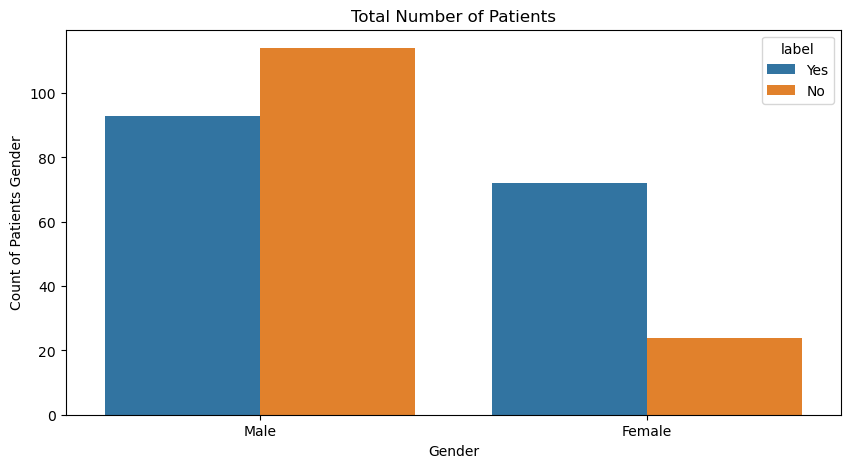

In [18]:
# Investigating the distribution of the target variable among patients
plt.figure(figsize=(10, 5))
sns.countplot(x='gender', data=df, hue='label')
plt.xlabel('Gender')
plt.ylabel('Count of Patients Gender')
plt.title('Total Number of Patients')
plt.show()

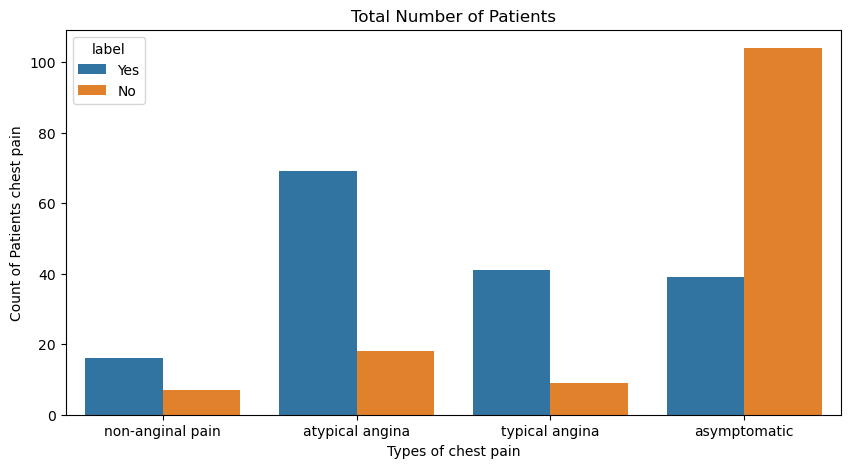

In [19]:
# Investigating the gender distribution of the patients
plt.figure(figsize=(10, 5))
sns.countplot(x='cp_cat', data=df, hue='label')
plt.xlabel('Types of chest pain')
plt.ylabel('Count of Patients chest pain')
plt.title('Total Number of Patients')
plt.show()


### OBSERVATIONS:

The data analysis revealed notable trends regarding heart disease:

- Younger adults, aged 65 or younger, were observed to be susceptible to heart disease, indicating a potential shift in its prevalence among younger demographics. Further exploration into lifestyle factors, genetics, and environmental influences could elucidate this trend.

- Among these younger adults with heart disease, males were predominant. This finding prompts examination into gender-specific risk factors and symptomatology to tailor interventions effectively.

- Atypical angina emerged as the most prevalent symptom among patients with heart disease. This underscores the importance of recognizing diverse symptom presentations for accurate diagnosis and personalized treatment strategies.

In summary, the analysis highlights demographic shifts in heart disease prevalence, gender-specific differences in susceptibility, and the importance of nuanced symptom recognition for effective management.








### Multivariate Analysis

In [20]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_archieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult (<=65),Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult (<=55),Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult (<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult (<=65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult (<=65),Female,asymptomatic,Yes


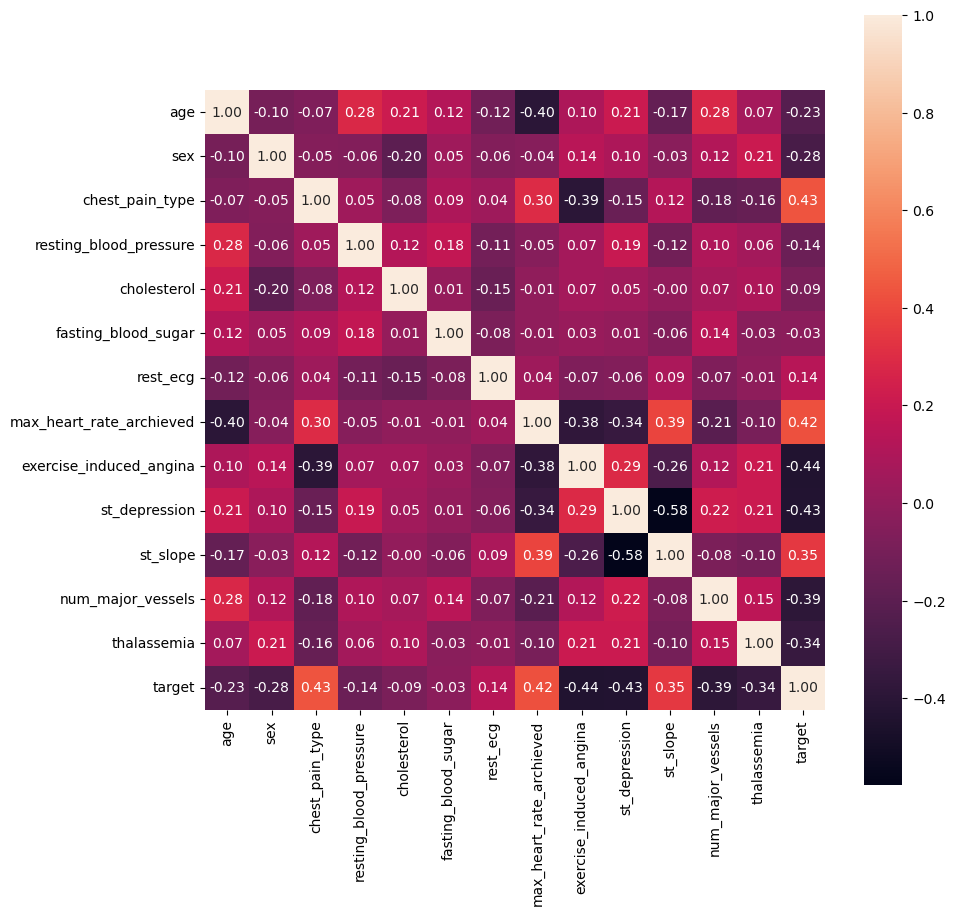

In [21]:
# Exclude non-numeric columns from correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,10))
hm = sns.heatmap(numeric_df.corr(), cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size':10})
plt.show()


### OBSERVATIONS:

Based on the multivariate analysis, the correlations between various features and the target variable (presence of heart disease) are as follows:

Weak Negative Correlation:

- Age and Target: Correlation of -0.23 indicates a weak negative correlation, implying that as age increases, there is a slight tendency for the likelihood of heart disease to decrease.

- Sex and Target: Correlation of -0.28 also suggests a weak negative correlation, indicating that being male is associated with a slightly lower likelihood of heart disease compared to being female.

- Resting blood pressure and Target: Correlation of -0.14 demonstrates a weak negative correlation, indicating a slight decrease in the likelihood of heart disease with increasing resting blood pressure.

- Fasting blood sugar and Target: Correlation of -0.03 indicates a weak negative correlation, suggesting a minimal impact of fasting blood sugar levels on the likelihood of heart disease.

Strong Negative Correlation:

- Cholesterol and Target: Correlation of -0.9 signifies a strong negative correlation, indicating that higher cholesterol levels are strongly associated with a lower likelihood of heart disease.

Weak Positive Correlation:

- Chest pain type and Target: Correlation of 0.43 suggests a weak positive correlation, implying that certain types of chest pain may slightly increase the likelihood of heart disease.

- Rest ECG and Target: Correlation of 0.14 indicates a weak positive correlation, suggesting a slight increase in the likelihood of heart disease with specific resting electrocardiographic results.

- Max heart rate achieved and Target: Correlation of 0.42 demonstrates a weak positive correlation, indicating that higher maximum heart rates achieved may slightly increase the likelihood of heart disease.

- ST slope and Target: Correlation of 0.35 suggests a weak positive correlation, indicating that certain patterns of ST segment slope may slightly increase the likelihood of heart disease.

Strong Negative Correlation:

- Exercise-induced angina and Target: Correlation of -0.44 signifies a strong negative correlation, suggesting that the presence of exercise-induced angina is strongly associated with a lower likelihood of heart disease.

- ST depression and Target: Correlation of -0.43 also represents a strong negative correlation, indicating that greater ST depression levels are strongly associated with a lower likelihood of heart disease.

- Number of major vessels and Target: Correlation of -0.39 indicates a strong negative correlation, suggesting that a higher number of major vessels with abnormal blood flow are strongly associated with a lower likelihood of heart disease.

- Thalassemia and Target: Correlation of -0.34 represents a strong negative correlation, indicating that certain types of thalassemia are strongly associated with a lower likelihood of heart disease.



### Data pre-processing

In [22]:
df1 = df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 
          'rest_ecg', 'max_heart_rate_archieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 
          'num_major_vessels', 'thalassemia']]

label = df[['target']]


In [23]:
df1.dtypes

age                           int64
sex                           int64
chest_pain_type               int64
resting_blood_pressure        int64
cholesterol                   int64
fasting_blood_sugar           int64
rest_ecg                      int64
max_heart_rate_archieved      int64
exercise_induced_angina       int64
st_depression               float64
st_slope                      int64
num_major_vessels             int64
thalassemia                   int64
dtype: object

In [24]:
scaler = MinMaxScaler()

df1["Scaled_RBP"] = scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1, 1))
df1["Scaled_chol"] = scaler.fit_transform(df1[['cholesterol']].values.reshape(-1, 1))
df1["Scaled_thal"] = scaler.fit_transform(df1[['thalassemia']].values.reshape(-1, 1))
df1["Scaled_max_heart_rate_archieved"] = scaler.fit_transform(df1[['max_heart_rate_archieved']].values.reshape(-1, 1))

df1.drop(['resting_blood_pressure', 'cholesterol', 'thalassemia', 'max_heart_rate_archieved'], axis=1, inplace=True)

In [25]:
df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate_archieved
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


In [26]:
X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [27]:
X_train

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate_archieved
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153
75,55,0,1,0,0,0,1.4,1,0,0.386792,0.283105,0.666667,0.687023
176,60,1,0,1,1,1,1.4,2,2,0.216981,0.237443,1.000000,0.679389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,0,1,0,0.6,1,1,0.433962,0.244292,1.000000,0.702290
71,51,1,2,0,1,1,0.0,2,1,0.000000,0.230594,1.000000,0.633588
106,69,1,3,1,0,0,0.1,1,1,0.622642,0.246575,0.666667,0.458015
270,46,1,0,0,0,0,0.8,2,0,0.245283,0.280822,1.000000,0.557252


In [28]:
# Construct and fit the model to the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)
ly_pred = lr.predict(X_test)


print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))


Logistic Regression
Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1-score: 0.8571428571428571
AUC-ROC: 0.8529094827586207


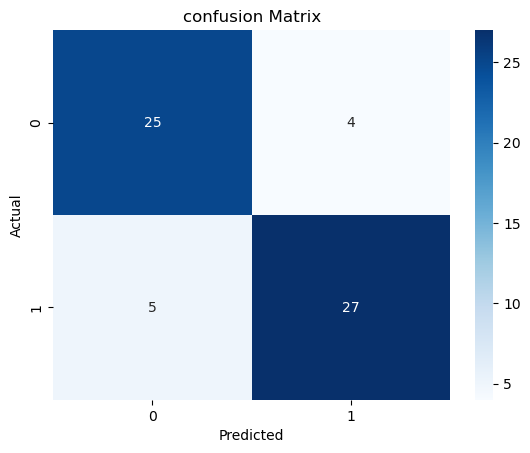

In [30]:
# Create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion Matrix")
plt.show()

In [32]:

# Model Building
# Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))



Random Forest
Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Recall: 0.875
F1-score: 0.8615384615384615
AUC-ROC: 0.8512931034482758


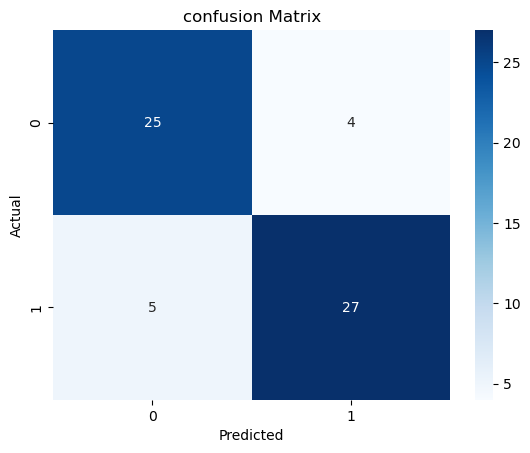

In [33]:
# Create a confusion matrix
rfc = confusion_matrix(y_test, ly_pred)

# Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("confusion Matrix")
plt.show()

In [35]:
classifiers = [
    [XGBClassifier(), 'XGB Classifier'],
    [RandomForestClassifier(), 'RandomForest'],
    [KNeighborsClassifier(), 'K-Nearest Neighbors'],
    [SGDClassifier(), 'SGD Classifier'],
    [SVC(), 'SVC'],
    [GaussianNB(), 'Naive Bayes'],
    [LogisticRegression(), 'Logistic Regression'],
    [DecisionTreeClassifier(random_state=42), 'DecisionTree']
]

In [39]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = [str(round(a_score*100, 2)) + '%']
    precision_list[model_name] = [str(round(p_score*100, 2)) + '%']
    recall_list[model_name] = [str(round(r_score*100, 2)) + '%']
    roc_list[model_name] = [str(round(roc_score*100, 2)) + '%']
    
    if model_name != classifiers[-1][1]:
        print('')


In [40]:
acc_list

{'XGB Classifier': ['81.97%'],
 'RandomForest': ['83.61%'],
 'K-Nearest Neighbors': ['75.41%'],
 'SGD Classifier': ['88.52%'],
 'SVC': ['65.57%'],
 'Naive Bayes': ['86.89%'],
 'Logistic Regression': ['85.25%'],
 'DecisionTree': ['85.25%']}

In [42]:
print("Accuracy Score")
sl = pd.DataFrame(acc_list)
sl.head()


Accuracy Score


,XGB Classifier,RandomForest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Logistic Regression,DecisionTree
0,81.97%,83.61%,75.41%,88.52%,65.57%,86.89%,85.25%,85.25%


In [44]:
print("Precision Score")
sl = pd.DataFrame(precision_list)
sl.head()


Precision Score


,XGB Classifier,RandomForest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Logistic Regression,DecisionTree
0,86.21%,84.38%,79.31%,83.78%,65.71%,90.0%,87.1%,92.59%


In [45]:
print("recall Score")
sl = pd.DataFrame(recall_list)
sl.head()


recall Score


,XGB Classifier,RandomForest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Logistic Regression,DecisionTree
0,78.12%,84.38%,71.88%,96.88%,71.88%,84.38%,84.38%,78.12%


In [46]:
print("Roc Score")
sl = pd.DataFrame(roc_list)
sl.head()


Roc Score


,XGB Classifier,RandomForest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Logistic Regression,DecisionTree
0,82.17%,83.57%,75.59%,88.09%,65.25%,87.02%,85.29%,85.61%


### OBSERVATIONS AND RECOMMENDATIONS :

- SGD Classifier performed the best in terms of accuracy. This classifier may be considered as the primary choice for heart disease prediction based on the provided features.
- RandomForest, Logistic Regression, and DecisionTree classifiers also performed well with similar accuracy rates. They could be used as alternative options if the SGD Classifier's performance is not satisfactory or for ensemble methods.
- Naive Bayes classifier also showed promising results and could be considered as an alternative, especially for its simplicity and efficiency.
- XGB Classifier had a slightly lower accuracy compared to other top-performing classifiers but still performed reasonably well.
- K-Nearest Neighbors showed a lower accuracy compared to other classifiers, indicating that its performance might not be optimal for this particular dataset.
- SVC had the lowest accuracy among all classifiers, suggesting that its performance might not be suitable for this dataset or may require further tuning.

In conclusion, based on the accuracy percentages, the SGD Classifier stands out as the top performer for heart disease prediction. However, it's essential to consider other factors such as model interpretability, computational efficiency, and potential overfitting when selecting the final model. Experimentation with ensemble methods and hyperparameter tuning could further enhance the performance of selected classifiers.